In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("dataset.csv")

In [ ]:
df.head(5)

,Date,Dealer,City,Product,Vehicle,Shipped,Returned
0,01-01-2007,17,NAG,321123678,Minitruck,15,1
1,01-01-2007,16,NAG,121890987,Vikram,1,0
2,01-01-2007,10,PUN,123679678,Vikram,18,1
3,01-01-2007,33,KOL,333890567,AutoRick,5,1
4,01-01-2007,17,NAG,111679789,AutoRick,13,1


In [ ]:
df.columns

Index(['Date', 'Dealer', 'City ', 'Product ', 'Vehicle', 'Shipped  ',
       'Returned'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['Date', 'Dealer', 'City', 'Product', 'Vehicle', 'Shipped', 'Returned'], dtype='object')

In [ ]:
res_1 = df.groupby('City')['Returned'].sum()


In [ ]:
print(df.dtypes)

Date        object
Dealer       int64
City        object
Product      int64
Vehicle     object
Shipped      int64
Returned     int64
dtype: object


In [ ]:
print(res_1)

City
GOA    2171
KOL    3036
MUM    2893
NAG    3160
PUN    2568
Name: Returned, dtype: int64


In [ ]:
res_2 = df.groupby('Dealer')['Returned'].sum()
print(res_2)

Dealer
2      525
3     1516
6      445
7      407
8      455
10     408
12     882
14     472
15     351
16     946
17     929
20     423
21     862
22     490
24     360
28     485
33     489
34     409
35     363
36     440
41     454
43     420
47     854
49     443
Name: Returned, dtype: int64


In [ ]:
res_3 = df.groupby('Vehicle')['Returned'].sum()
print(res_3)

Vehicle
AutoRick     2268
Minitruck    8140
Vikram       3420
Name: Returned, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['PaintType'] = df['Product'].astype(str).str[:3]
df['Color'] = df['Product'].astype(str).str[3:6]
df['TinSize'] = df['Product'].astype(str).str[6:9]

Adding price info based on paint type

In [ ]:
cheap_types = ['111', '112', '121', '123']
midrange_types = ['213', '222', '232']
expensive_types = ['321', '333', '343']

In [ ]:
def categorize_paint_type(paint_type):
    if paint_type in cheap_types:
        return 'Cheap'
    elif paint_type in midrange_types:
        return 'Mid-range'
    elif paint_type in expensive_types:
        return 'Expensive'
    else:
        return 'Unknown'

In [ ]:
df['PaintCategory'] = df['PaintType'].apply(categorize_paint_type)

mapping price on 4

In [ ]:
def get_price(row):
    tin_size = row['TinSize']
    paint_type = row['PaintType']

In [ ]:
price_matrix = {
        '123': {'Cheap': 20, 'Mid-range': 30, 'Expensive': 40},
        '234': {'Cheap': 40, 'Mid-range': 60, 'Expensive': 80},
        '345': {'Cheap': 70, 'Mid-range': 100, 'Expensive': 140},
        '456': {'Cheap': 150, 'Mid-range': 220, 'Expensive': 250},
        '567': {'Cheap': 250, 'Mid-range': 400, 'Expensive': 500},
        '678': {'Cheap': 350, 'Mid-range': 700, 'Expensive': 800},
        '765': {'Cheap': 500, 'Mid-range': 1000, 'Expensive': 1000},
        '789': {'Cheap': 600, 'Mid-range': 1300, 'Expensive': 1200},
        '890': {'Cheap': 700, 'Mid-range': 1500, 'Expensive': 1400},
        '987': {'Cheap': 1000, 'Mid-range': 2000, 'Expensive': 1800}
    }

In [ ]:
def get_price(row):
    tin_size = row['TinSize']
    paint_type = row['PaintType']
    price_matrix = {
        '123': {'Cheap': 20, 'Mid-range': 30, 'Expensive': 40},
        '234': {'Cheap': 40, 'Mid-range': 60, 'Expensive': 80},
        '345': {'Cheap': 70, 'Mid-range': 100, 'Expensive': 140},
        '456': {'Cheap': 150, 'Mid-range': 220, 'Expensive': 250},
        '567': {'Cheap': 250, 'Mid-range': 400, 'Expensive': 500},
        '678': {'Cheap': 350, 'Mid-range': 700, 'Expensive': 800},
        '765': {'Cheap': 500, 'Mid-range': 1000, 'Expensive': 1000},
        '789': {'Cheap': 600, 'Mid-range': 1300, 'Expensive': 1200},
        '890': {'Cheap': 700, 'Mid-range': 1500, 'Expensive': 1400},
        '987': {'Cheap': 1000, 'Mid-range': 2000, 'Expensive': 1800}
    }
    category = row['PaintCategory']
    if tin_size in price_matrix and category in price_matrix[tin_size]:
        return price_matrix[tin_size][category]
    return 0


df['Price'] = df.apply(get_price, axis=1)

damage ratios

In [ ]:
df['DamageRate'] = df['Returned'] / df['Shipped']

In [ ]:
df['FinancialLoss'] = df['Returned'] * df['Price']

In [ ]:
safety_limits = {
    'Vikram': 22,
    'AutoRick':13,
    'Minitruck': 40
}

In [ ]:
df['SafetyLimit'] = df['Vehicle'].map(safety_limits)
df['Overloaded'] = df['Shipped'] > df['SafetyLimit']

In [ ]:
safety_limits = {k.strip(): v for k, v in safety_limits.items()}

In [ ]:
df.head()

,Date,Dealer,City,Product,Vehicle,Shipped,Returned,PaintType,Color,TinSize,PaintCategory,Price,DamageRate,FinancialLoss,SafetyLimit,Overloaded
0,01-01-2007,17,NAG,321123678,Minitruck,15,1,321,123,678,Expensive,800,0.066667,800,40,False
1,01-01-2007,16,NAG,121890987,Vikram,1,0,121,890,987,Cheap,1000,0.000000,0,22,False
2,01-01-2007,10,PUN,123679678,Vikram,18,1,123,679,678,Cheap,350,0.055556,350,22,False
3,01-01-2007,33,KOL,333890567,AutoRick,5,1,333,890,567,Expensive,500,0.200000,500,13,False
4,01-01-2007,17,NAG,111679789,AutoRick,13,1,111,679,789,Cheap,600,0.076923,600,13,False


checking damage factors

In [ ]:
overall_damage_rate = df['Returned'].sum() / df['Shipped'].sum()
print(f"Overall damage rate: {overall_damage_rate:.2%}")

Overall damage rate: 8.92%


Dealer damage

In [ ]:
dealer_damage = df.groupby('Dealer').agg({
    'Shipped': 'sum',
    'Returned': 'sum'
}).reset_index()

In [ ]:
dealer_damage['DamageRate'] = dealer_damage['Returned'] / dealer_damage['Shipped']

In [ ]:
dealer_damage['FinancialLoss'] = df.groupby('Dealer')['FinancialLoss'].sum().values

In [ ]:
dealer_damage = dealer_damage.sort_values('DamageRate', ascending=False)

In [ ]:
print("\nDamage rate by dealer (top 5):")
print(dealer_damage.head())


Damage rate by dealer (top 5):
   Dealer  Shipped  Returned  DamageRate  FinancialLoss
1       3    10382      1516    0.146022         784520
0       2     5419       525    0.096881         298620
2       6     4748       445    0.093724         290650
6      12     9466       882    0.093176         550780
4       8     4888       455    0.093085         262950


city wise

In [ ]:
city_damage = df.groupby('City').agg({
    'Shipped': 'sum',
    'Returned': 'sum'
}).reset_index()

In [ ]:
city_damage['DamageRate'] = city_damage['Returned'] / city_damage['Shipped']

In [ ]:
city_damage['FinancialLoss'] = df.groupby('City')['FinancialLoss'].sum().values

In [ ]:
city_damage = city_damage.sort_values('DamageRate', ascending=False)

In [ ]:
print("\nDamage rate by city/warehouse:")
print(city_damage)


Damage rate by city/warehouse:
  City  Shipped  Returned  DamageRate  FinancialLoss
2  MUM    25618      2893    0.112928        1620940
4  PUN    29748      2568    0.086325        1550880
0  GOA    25512      2171    0.085097        1245190
3  NAG    37699      3160    0.083822        1880100
1  KOL    36496      3036    0.083187        1738180


Damage by paint type

In [ ]:
paint_damage = df.groupby('PaintType').agg({
    'Shipped': 'sum',
    'Returned': 'sum'
}).reset_index()

In [ ]:
paint_damage['DamageRate'] = paint_damage['Returned'] / paint_damage['Shipped']

In [ ]:
paint_damage['FinancialLoss'] = df.groupby('PaintType')['FinancialLoss'].sum().values

In [ ]:
paint_damage = paint_damage.sort_values('DamageRate', ascending=False)

In [ ]:
print("\nDamage rate by paint type (top 5):")
print(paint_damage.head())


Damage rate by paint type (top 5):
  PaintType  Shipped  Returned  DamageRate  FinancialLoss
2       121    15433      1511    0.097907         552790
5       222    15916      1446    0.090852        1067140
7       321    15743      1419    0.090135         985140
4       213    15173      1364    0.089897        1039000
6       232    15247      1367    0.089657         920230


by tin size

In [ ]:
tin_damage = df.groupby('TinSize').agg({
    'Shipped': 'sum',
    'Returned': 'sum'
}).reset_index()

In [ ]:
tin_damage['DamageRate'] = tin_damage['Returned'] / tin_damage['Shipped']

In [ ]:
tin_damage['FinancialLoss'] = df.groupby('TinSize')['FinancialLoss'].sum().values

In [ ]:
tin_damage = tin_damage.sort_values('DamageRate', ascending=False)

In [ ]:
print("\nDamage rate by tin size (top 5):")
print(tin_damage.head())


Damage rate by tin size (top 5):
  TinSize  Shipped  Returned  DamageRate  FinancialLoss
3     456    16958      1594    0.093997         318620
6     765    15006      1388    0.092496        1108000
4     567    14707      1328    0.090297         495600
0     123    15364      1373    0.089365          40670
1     234    16246      1444    0.088883          84320


by vehicle type

In [ ]:
vehicle_damage = df.groupby('Vehicle').agg({
    'Shipped': 'sum',
    'Returned': 'sum'
}).reset_index()

In [ ]:
vehicle_damage['DamageRate'] = vehicle_damage['Returned'] / vehicle_damage['Shipped']

In [ ]:
vehicle_damage['FinancialLoss'] = df.groupby('Vehicle')['FinancialLoss'].sum().values

In [ ]:
vehicle_damage = vehicle_damage.sort_values('DamageRate', ascending=False)

In [ ]:
print("\nDamage rate by vehicle type:")
print(vehicle_damage)


Damage rate by vehicle type:
     Vehicle  Shipped  Returned  DamageRate  FinancialLoss
1  Minitruck    84603      8140    0.096214        4682320
0   AutoRick    27056      2268    0.083826        1366020
2     Vikram    43414      3420    0.078776        1986950


by overloading

In [ ]:
overload_damage = df.groupby('Overloaded').agg({
    'Shipped': 'sum',
    'Returned': 'sum'
}).reset_index()

In [ ]:
overload_damage['DamageRate'] = overload_damage['Returned'] / overload_damage['Shipped']

In [ ]:
overload_damage['FinancialLoss'] = df.groupby('Overloaded')['FinancialLoss'].sum().values

In [ ]:
print("\nDamage rate by overloading status:")
print(overload_damage)



Damage rate by overloading status:
   Overloaded  Shipped  Returned  DamageRate  FinancialLoss
0       False   108194      4738    0.043792        2766440
1        True    46879      9090    0.193903        5268850


In [ ]:
def plot_factor_damage(df, factor, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=factor, y='DamageRate', data=df, errorbar=None)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

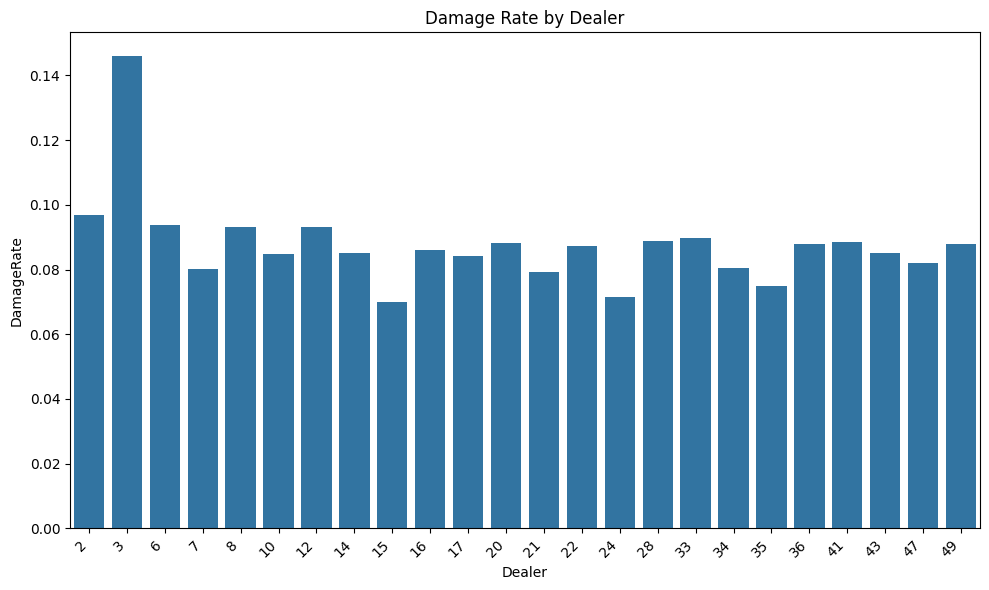

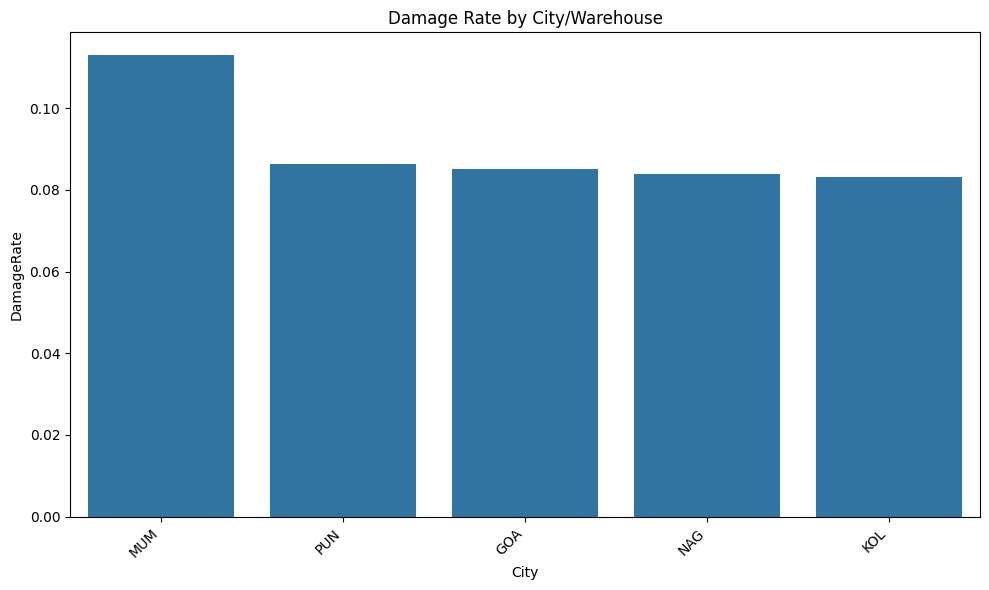

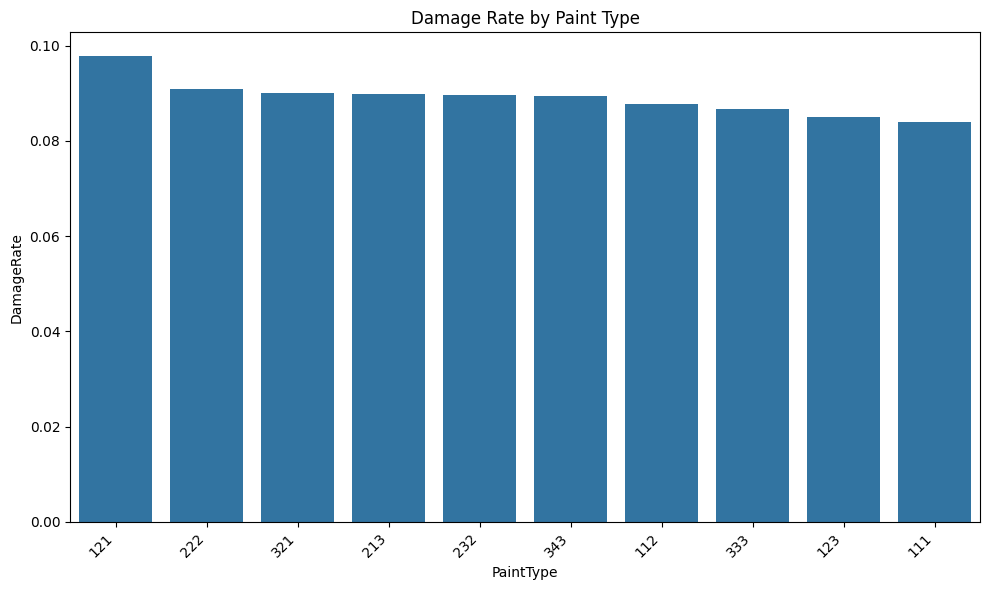

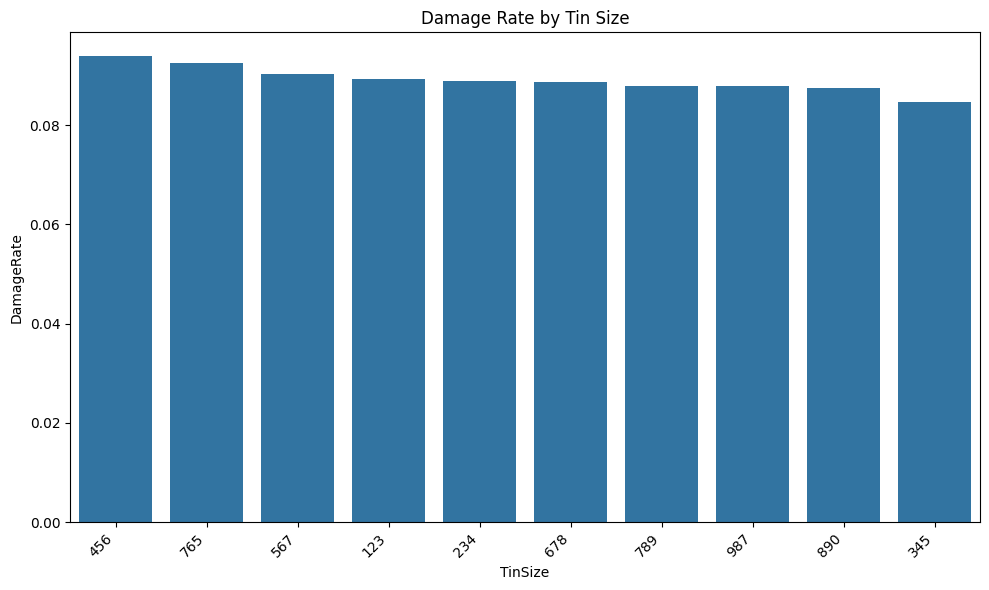

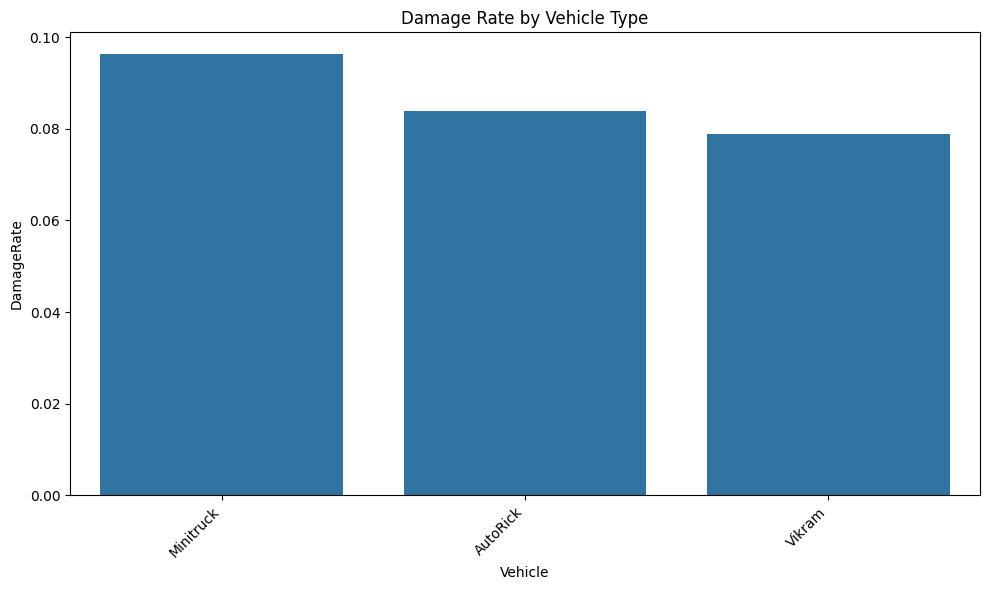

In [ ]:
plot_factor_damage(dealer_damage, 'Dealer', 'Damage Rate by Dealer')
plot_factor_damage(city_damage, 'City', 'Damage Rate by City/Warehouse')
plot_factor_damage(paint_damage, 'PaintType', 'Damage Rate by Paint Type')
plot_factor_damage(tin_damage, 'TinSize', 'Damage Rate by Tin Size')
plot_factor_damage(vehicle_damage, 'Vehicle', 'Damage Rate by Vehicle Type')

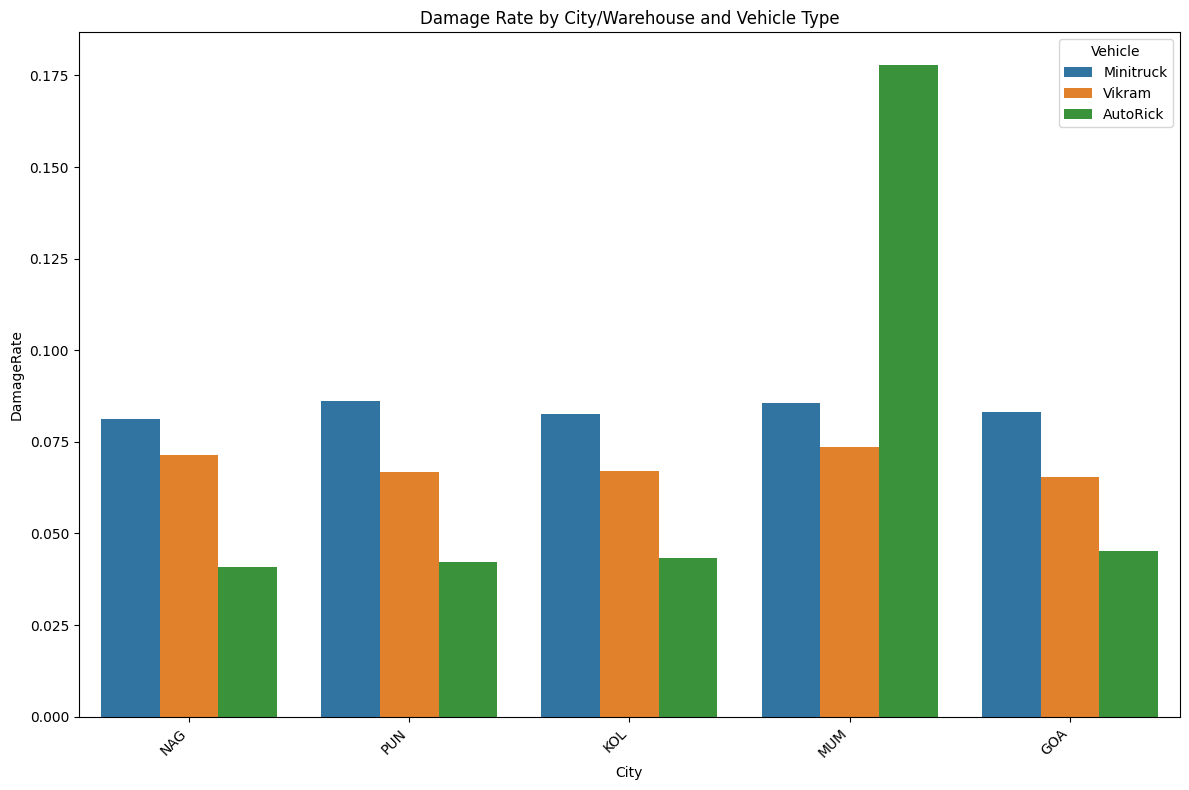

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='DamageRate', hue='Vehicle', data=df, errorbar=None)
plt.title('Damage Rate by City/Warehouse and Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Financial loss visualization

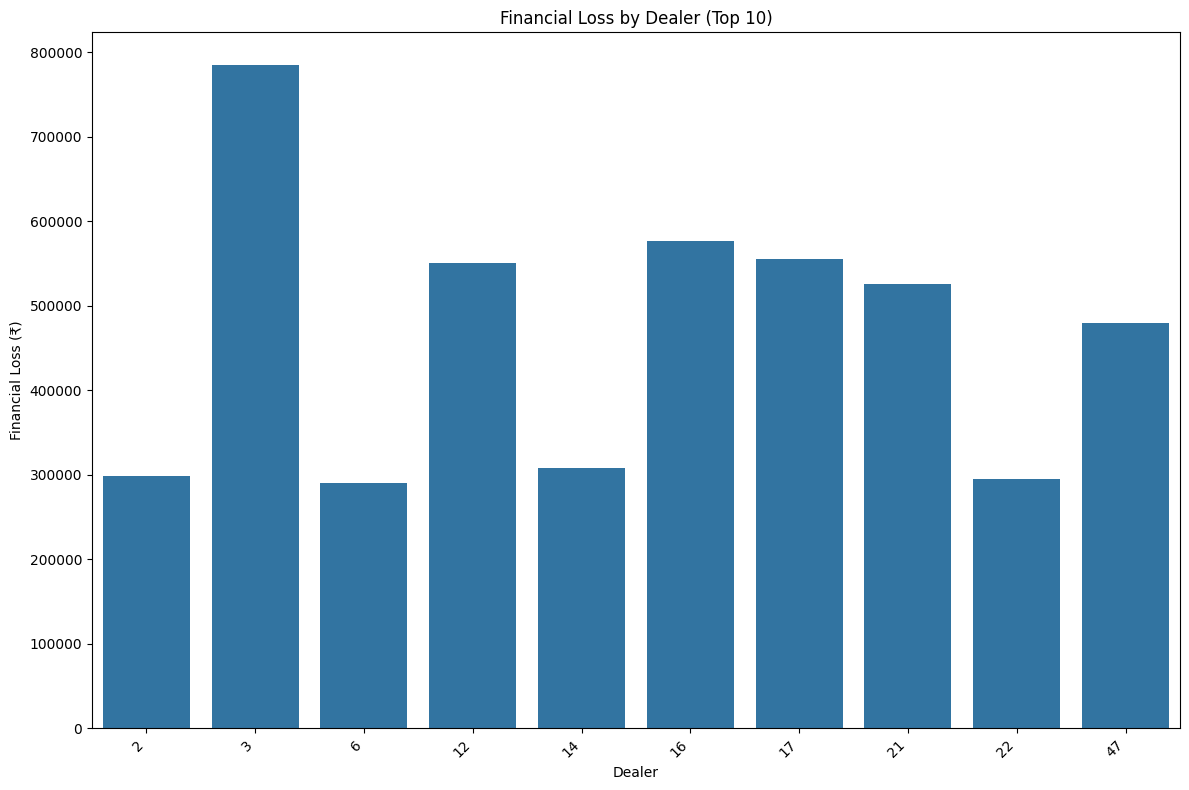

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Dealer', y='FinancialLoss', data=dealer_damage.sort_values('FinancialLoss', ascending=False).head(10), errorbar=None)
plt.title('Financial Loss by Dealer (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Financial Loss (₹)')
plt.tight_layout()
plt.show()

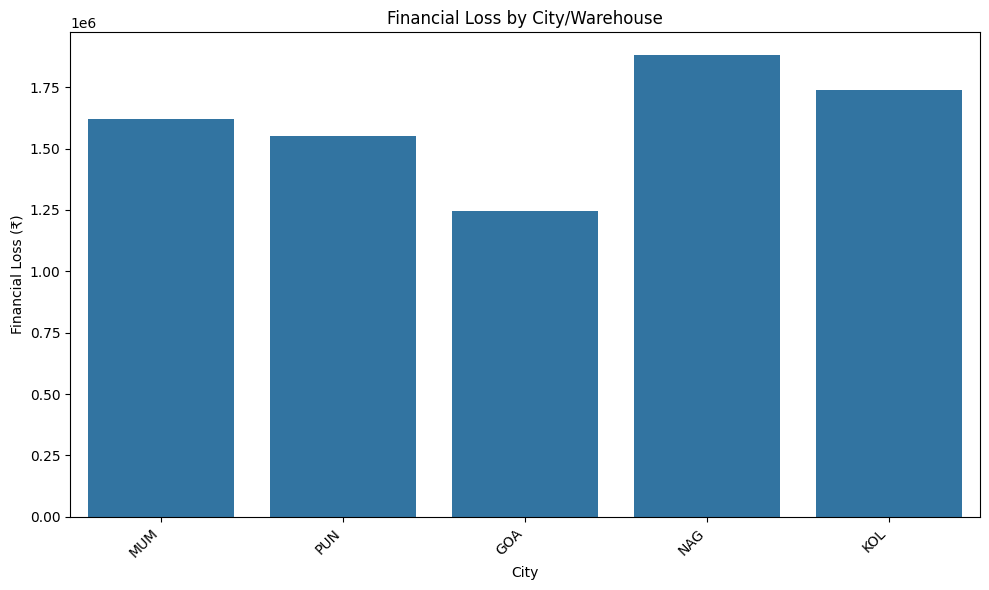

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='FinancialLoss', data=city_damage, errorbar=None)
plt.title('Financial Loss by City/Warehouse')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Financial Loss (₹)')
plt.tight_layout()
plt.show()

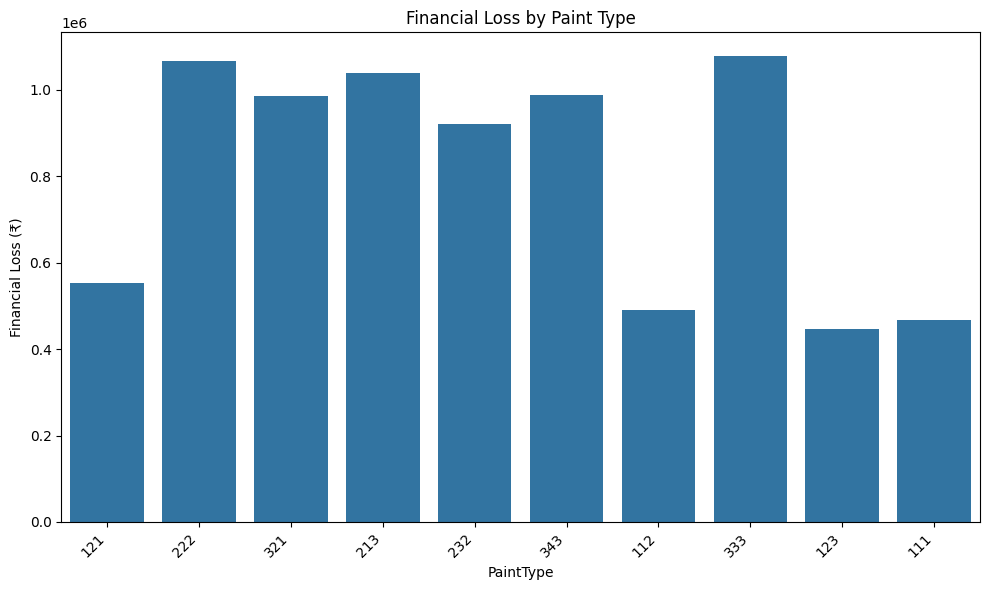

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PaintType', y='FinancialLoss', data=paint_damage, errorbar=None)
plt.title('Financial Loss by Paint Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Financial Loss (₹)')
plt.tight_layout()
plt.show()

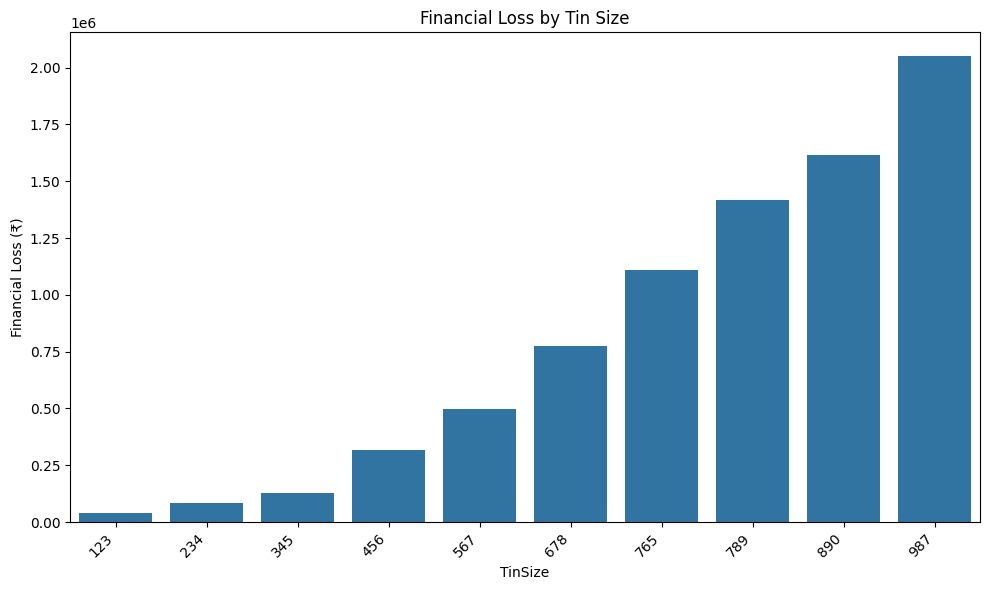

In [ ]:
plt.figure(figsize=(10, 6))
tin_damage_sorted = tin_damage.sort_values('TinSize')
sns.barplot(x='TinSize', y='FinancialLoss', data=tin_damage_sorted, errorbar=None)
plt.title('Financial Loss by Tin Size')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Financial Loss (₹)')
plt.tight_layout()
plt.show()

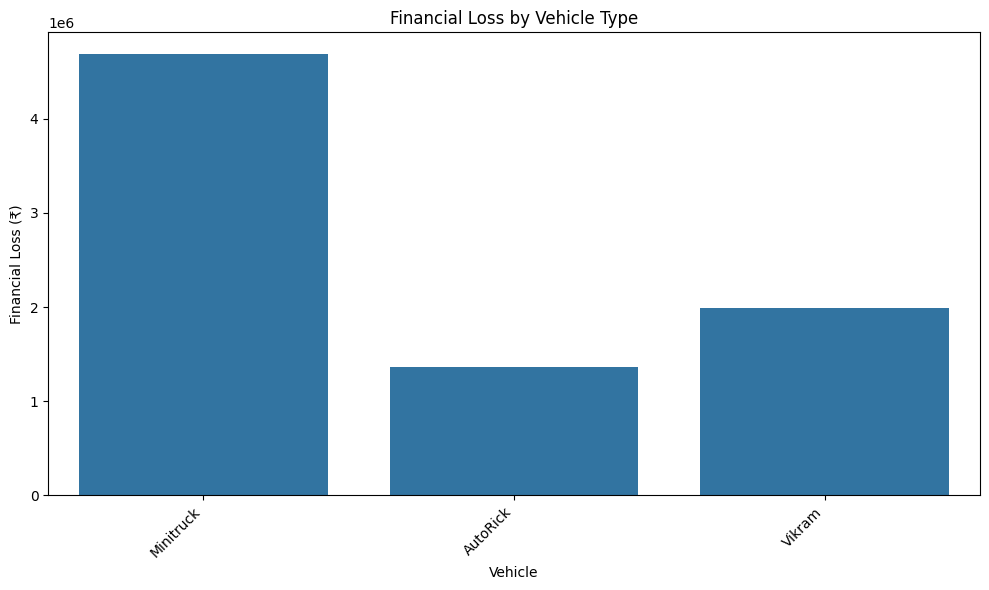

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle', y='FinancialLoss', data=vehicle_damage, errorbar=None)
plt.title('Financial Loss by Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Financial Loss (₹)')
plt.tight_layout()
plt.show()

percentage exceeded loads

In [ ]:
df_overload_pct = df.groupby(['City', 'Vehicle'])['Overloaded'].agg(['sum', 'count']).reset_index()
df_overload_pct['pct_overloaded'] = (df_overload_pct['sum'] / df_overload_pct['count'] * 100).round(2)

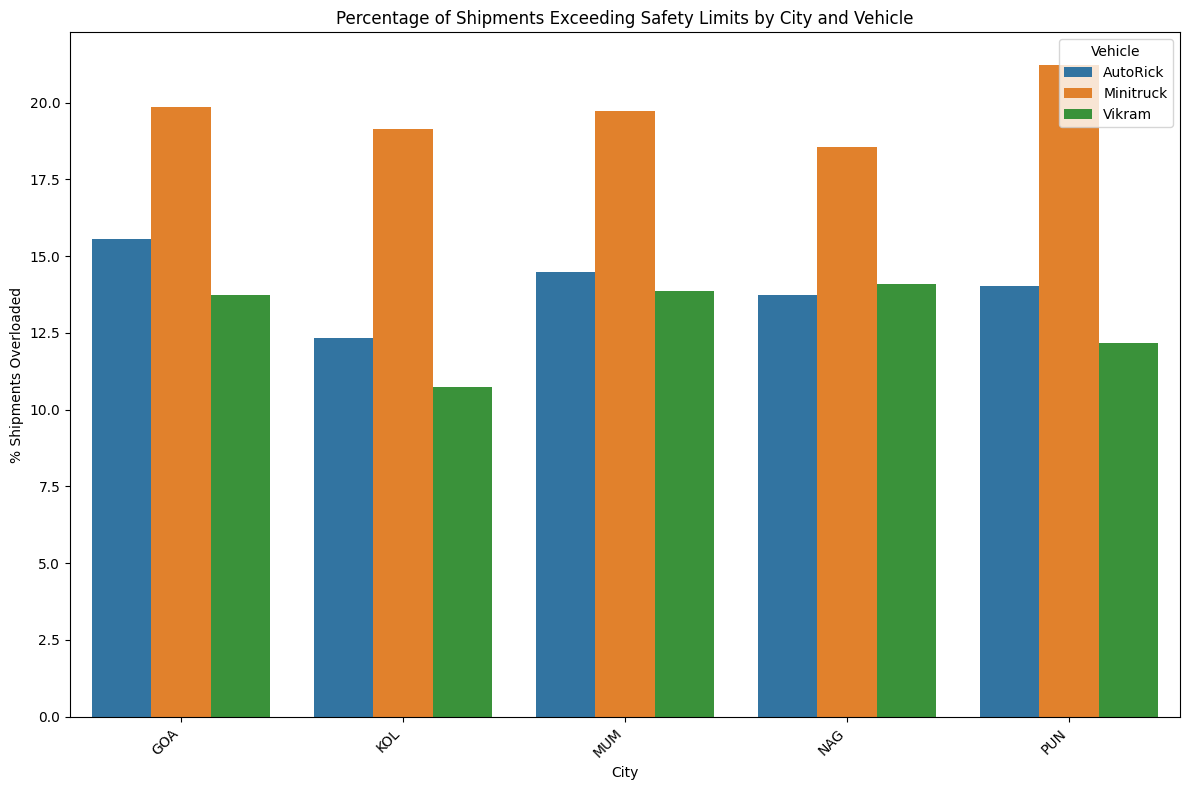

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='pct_overloaded', hue='Vehicle', data=df_overload_pct, errorbar=None)
plt.title('Percentage of Shipments Exceeding Safety Limits by City and Vehicle')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Shipments Overloaded')
plt.tight_layout()
plt.show()

pivot for city and vehicle

In [ ]:
pivot_city_vehicle = pd.pivot_table(df,
                                   values=['Returned', 'Shipped', 'FinancialLoss'],
                                   index='City',
                                   columns='Vehicle',
                                   aggfunc='sum',
                                   fill_value=0)

In [ ]:
print("\nFinancial Loss by City and Vehicle:")
print(pivot_city_vehicle['FinancialLoss'])


Financial Loss by City and Vehicle:
Vehicle  AutoRick  Minitruck  Vikram
City                                
GOA        181870     729060  334260
KOL        215670    1088140  434370
MUM        551780     750530  318630
NAG        238260    1072100  569740
PUN        178440    1042490  329950


paint type and tin size

In [ ]:
pivot_paint_tin = pd.pivot_table(df,
                               values=['Returned', 'Shipped', 'FinancialLoss'],
                               index='PaintType',
                               columns='TinSize',
                               aggfunc='sum',
                               fill_value=0)

In [ ]:
print("\nFinancial Loss by Paint Type and Tin Size:")
print(pivot_paint_tin['FinancialLoss'])



Financial Loss by Paint Type and Tin Size:
TinSize     123    234    345    456    567     678     765     789     890  \
PaintType                                                                     
111        1820   6120   7000  21750  25750   54250   79000   69000   81900   
112        3040   4320   7210  23550  35750   47600   64500  100800  103600   
121        3120   5800  10570  28950  38000   42350   75000   74400  103600   
123        2940   4440   8890  25500  27000   49350   61500   49200   79100   
213        3420  11520  10500  24860  43200  100800  129000  258700  189000   
222        2700   8940  15000  40700  54400  101500  166000  185900  216000   
232        3870  11100  12000  32560  70000   89600  116000  139100  216000   
321        6520  12880  18340  39000  61000   92000  148000  184800  215600   
333        5040   8640  19600  37750  72500   99200  165000  164400  217000   
343        8200  10560  18620  44000  68000  100000  104000  189600  193200   

TinSize

vehicle and paint type

In [ ]:
pivot_vehicle_paint = pd.pivot_table(df,
                                   values=['Returned', 'Shipped', 'FinancialLoss'],
                                   index='Vehicle',
                                   columns='PaintType',
                                   aggfunc='sum',
                                   fill_value=0)

In [ ]:
print("\nFinancial Loss by Vehicle and Paint Type:")
print(pivot_vehicle_paint['FinancialLoss'])


Financial Loss by Vehicle and Paint Type:
PaintType     111     112     121     123     213     222     232     321  \
Vehicle                                                                     
AutoRick    77060   64870  109590   66540  165260  190800  170940  184520   
Minitruck  268620  299180  302260  248430  606800  632370  510100  567580   
Vikram     120910  126320  140940  131950  266940  243970  239190  233040   

PaintType     333     343  
Vehicle                    
AutoRick   163460  172980  
Minitruck  666960  580020  
Vikram     248510  235180  


In [ ]:
def check_overloading(row):
    if row['Vehicle'] == 'Autorickshaw' and row['Shipped'] > 13:
        return True
    elif row['Vehicle'] == 'Vikram' and row['Shipped'] > 22:
        return True
    elif row['Vehicle'] == 'Minitruck' and row['Shipped'] > 40:
        return True
    else:
        return False

In [ ]:
df['Overloaded'] = df.apply(check_overloading, axis=1)

In [ ]:
df_overload_pct = df.groupby(['City', 'Vehicle']).agg(
    overloaded_count=('Overloaded', lambda x: x.sum()),
    total_shipments=('Overloaded', 'count')
).reset_index()


In [ ]:
df_overload_pct['pct_overloaded'] = (df_overload_pct['overloaded_count'] / df_overload_pct['total_shipments'] * 100).round(2)

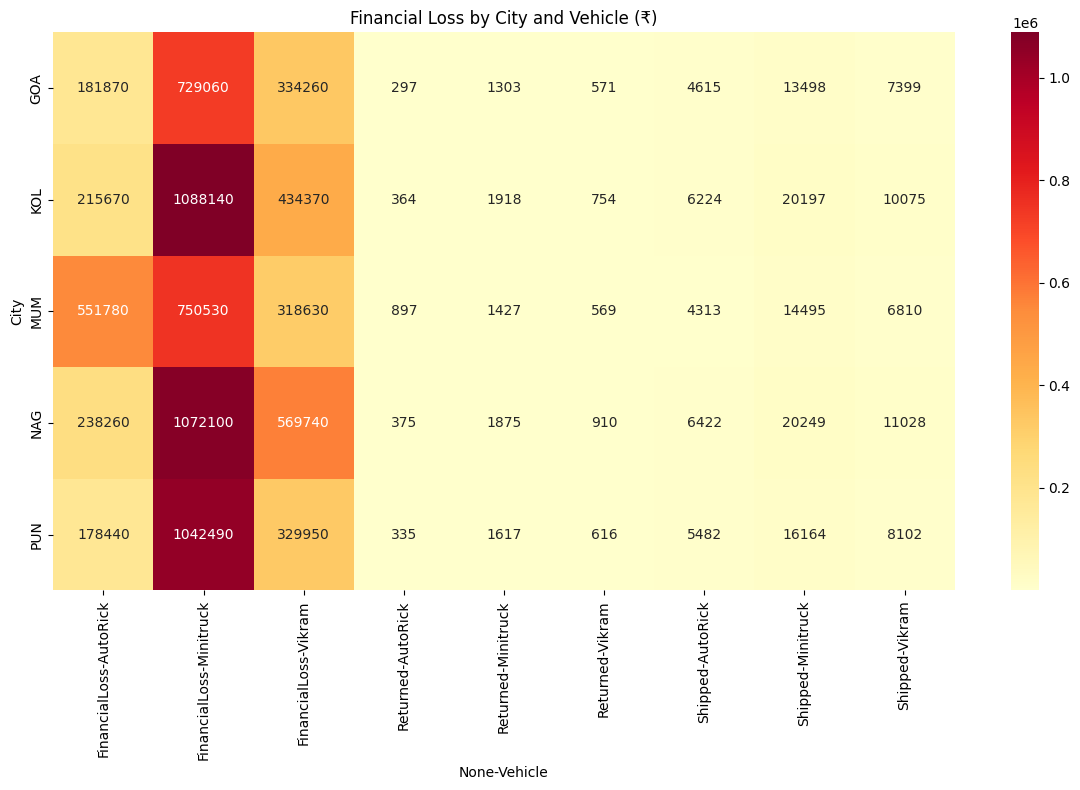

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_city_vehicle, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Financial Loss by City and Vehicle (₹)')
plt.tight_layout()
plt.savefig('heatmap_city_vehicle_loss.png')
plt.show()

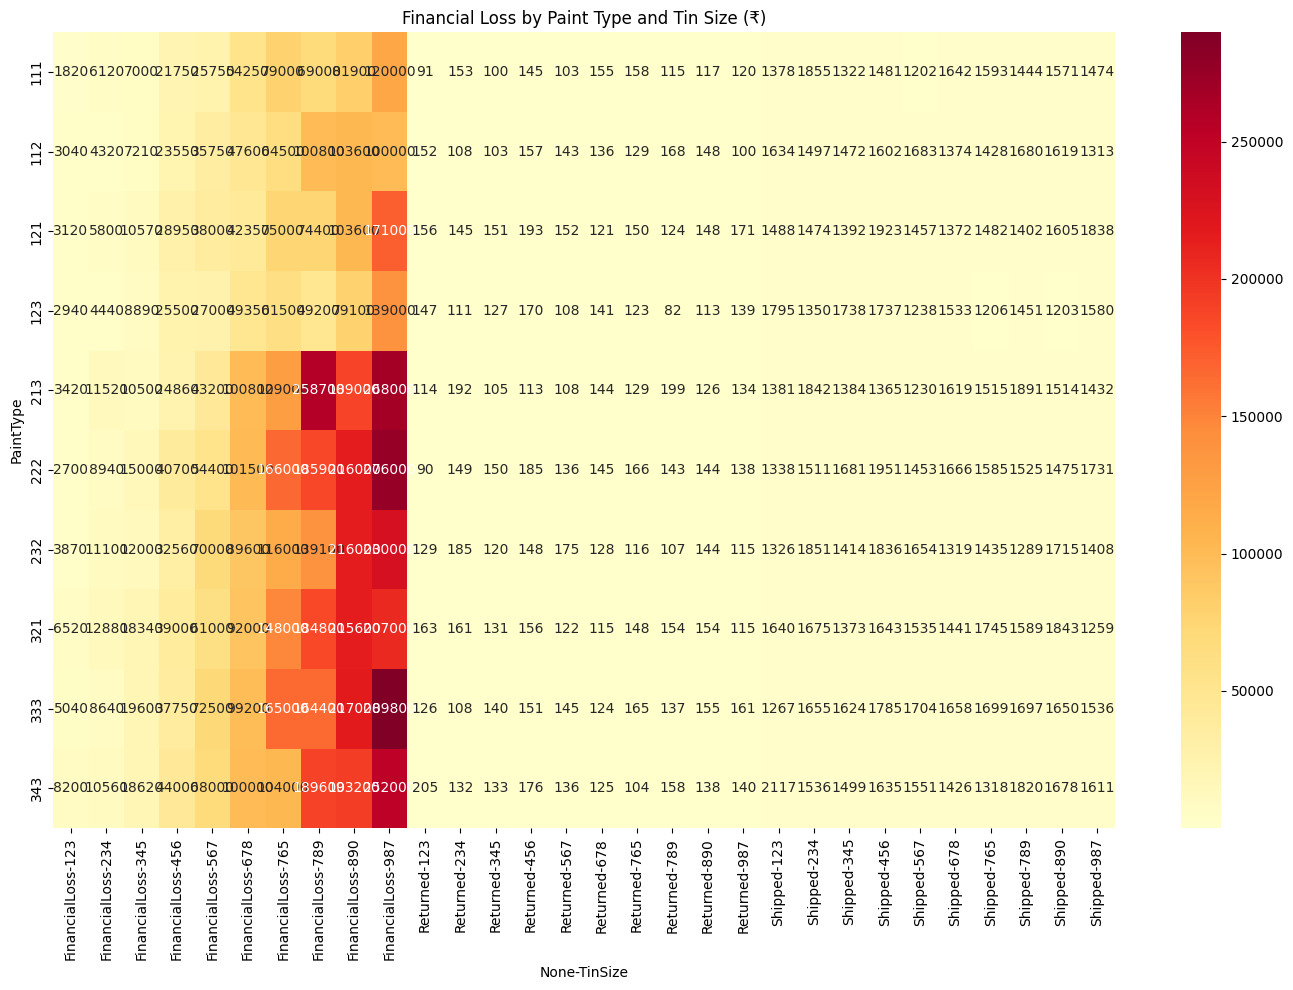

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_paint_tin, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Financial Loss by Paint Type and Tin Size (₹)')
plt.tight_layout()
plt.savefig('heatmap_paint_tin_loss.png')
plt.show()

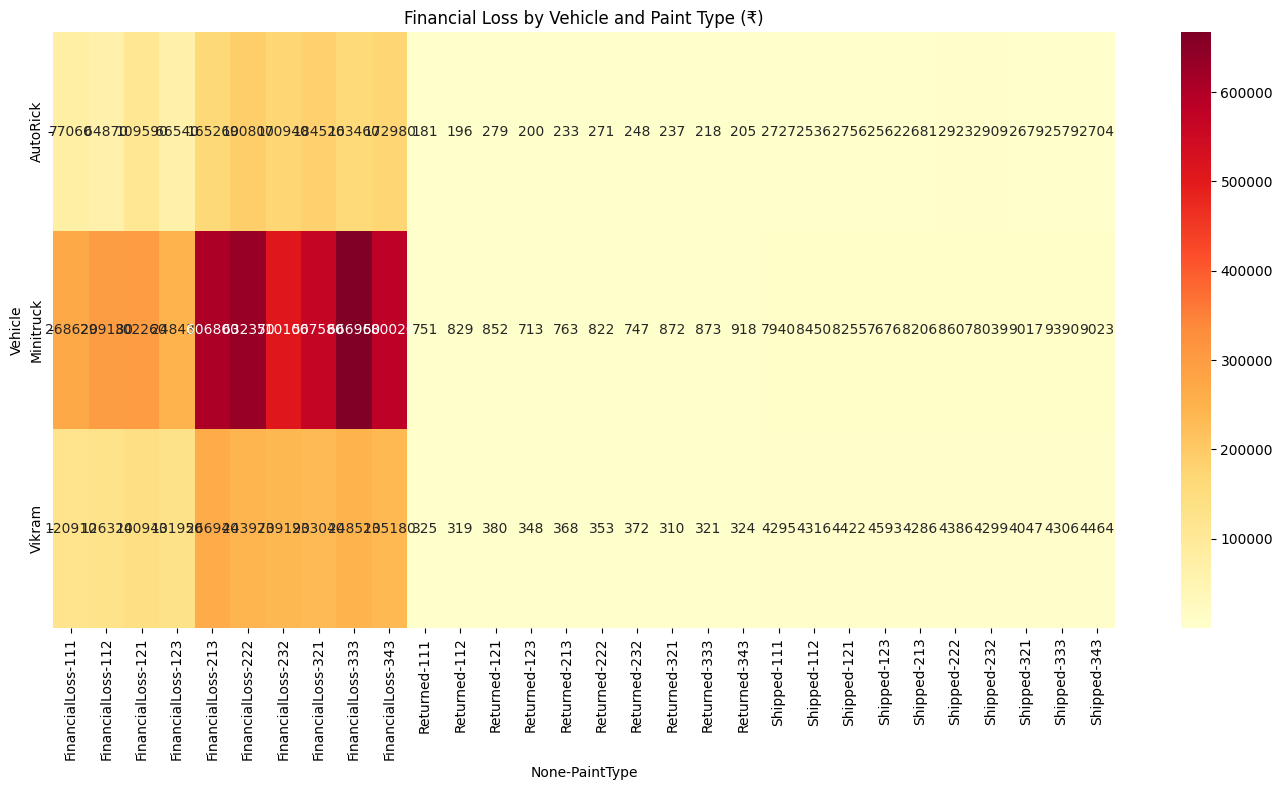

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_vehicle_paint, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Financial Loss by Vehicle and Paint Type (₹)')
plt.tight_layout()
plt.savefig('heatmap_vehicle_paint_loss.png')
plt.show()

In [ ]:
pivot_damage_rate = pd.pivot_table(df,
                                 values='DamageRate',
                                 index='City',
                                 columns='Vehicle',
                                 aggfunc='mean',
                                 fill_value=0)

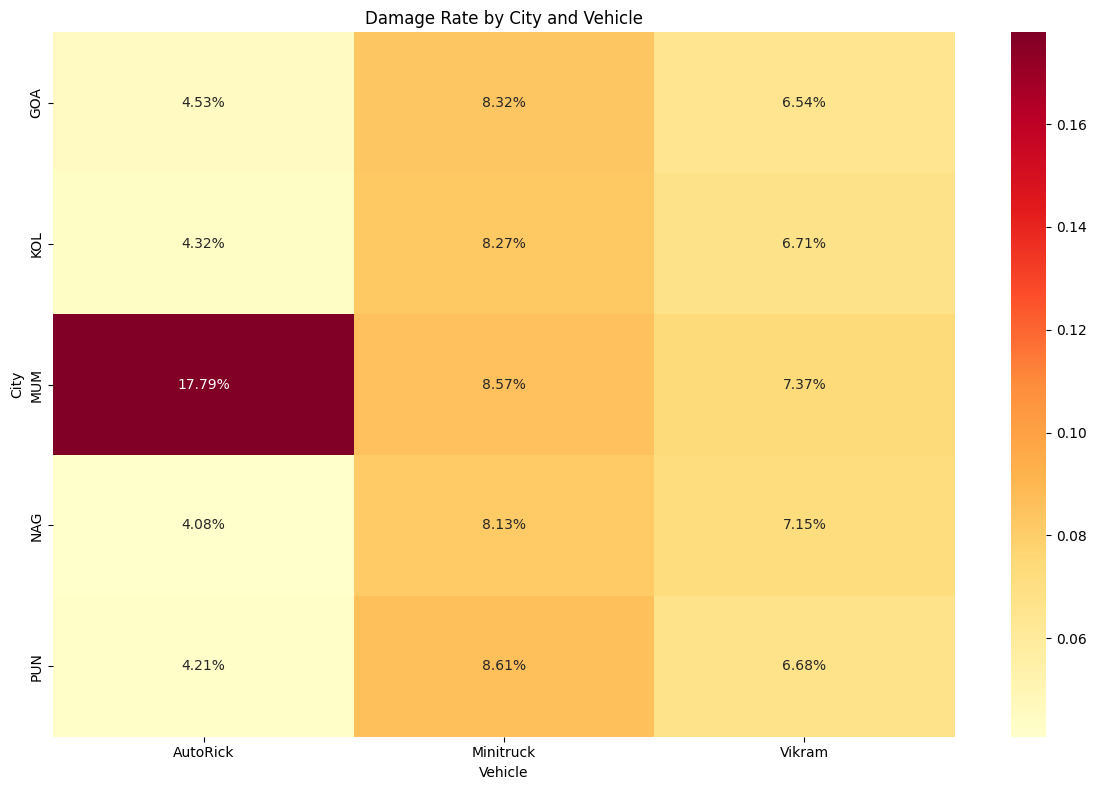

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_damage_rate, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Damage Rate by City and Vehicle')
plt.tight_layout()
plt.savefig('heatmap_city_vehicle_damage.png')
plt.show()

In [ ]:
print("\nSummary Statistics:")
print(f"Total Financial Loss: ₹{df['FinancialLoss'].sum():,.2f}")
print(f"Overall Damage Rate: {df['Returned'].sum() / df['Shipped'].sum():.2%}")
print(f"Percentage of Overloaded Shipments: {df['Overloaded'].mean() * 100:.2f}%")


Summary Statistics:
Total Financial Loss: ₹8,035,290.00
Overall Damage Rate: 8.92%
Percentage of Overloaded Shipments: 10.80%


In [ ]:
df.head()

,Date,Dealer,City,Product,Vehicle,Shipped,Returned,PaintType,Color,TinSize,PaintCategory,Price,DamageRate,FinancialLoss,SafetyLimit,Overloaded
0,01-01-2007,17,NAG,321123678,Minitruck,15,1,321,123,678,Expensive,800,0.066667,800,40,False
1,01-01-2007,16,NAG,121890987,Vikram,1,0,121,890,987,Cheap,1000,0.000000,0,22,False
2,01-01-2007,10,PUN,123679678,Vikram,18,1,123,679,678,Cheap,350,0.055556,350,22,False
3,01-01-2007,33,KOL,333890567,AutoRick,5,1,333,890,567,Expensive,500,0.200000,500,13,False
4,01-01-2007,17,NAG,111679789,AutoRick,13,1,111,679,789,Cheap,600,0.076923,600,13,False


In [ ]:
safety_limits = {
    'AutoRick': 13,
    'Vikram': 22,
    'Minitruck': 40
}
df['SafetyLimit'] = df['Vehicle'].map(safety_limits)

df['Overloaded'] = df['Shipped'] > df['SafetyLimit']
df['ExcessLoad'] = df.apply(lambda x: max(0, x['Shipped'] - x['SafetyLimit']), axis=1)
df['ExcessLoadPercentage'] = df.apply(lambda x: max(0, (x['Shipped'] - x['SafetyLimit']) / x['SafetyLimit'] * 100) if x['SafetyLimit'] > 0 else 0, axis=1)

In [ ]:
df_overload_pct = df.groupby(['City', 'Vehicle']).agg({
    'Overloaded': ['sum', 'count'],
    'Shipped': 'sum',
    'SafetyLimit': 'sum',
    'ExcessLoad': 'sum'
}).reset_index()

df_overload_pct.columns = ['City', 'Vehicle', 'Overloaded_Count', 'Total_Shipments',
                          'Total_Shipped', 'Total_Capacity', 'Total_Excess']

df_overload_pct['Pct_Overloaded'] = (df_overload_pct['Overloaded_Count'] /
                                    df_overload_pct['Total_Shipments'] * 100).round(2)

df_overload_pct['Avg_Overload_Pct'] = (df_overload_pct['Total_Excess'] /
                                      df_overload_pct['Total_Capacity'] * 100).round(2)

In [ ]:
df.head(5)

,Date,Dealer,City,Product,Vehicle,Shipped,Returned,PaintType,Color,TinSize,PaintCategory,Price,DamageRate,FinancialLoss,SafetyLimit,Overloaded,ExcessLoad,ExcessLoadPercentage
0,01-01-2007,17,NAG,321123678,Minitruck,15,1,321,123,678,Expensive,800,0.066667,800,40,False,0,0.000000
1,01-01-2007,16,NAG,121890987,Vikram,1,0,121,890,987,Cheap,1000,0.000000,0,22,False,0,0.000000
2,01-01-2007,10,PUN,123679678,Vikram,18,1,123,679,678,Cheap,350,0.055556,350,22,False,0,0.000000
3,01-01-2007,33,KOL,333890567,AutoRick,5,1,333,890,567,Expensive,500,0.200000,500,13,False,0,0.000000
4,01-01-2007,17,NAG,111679789,AutoRick,13,1,111,679,789,Cheap,600,0.076923,600,13,False,0,0.000000
5,01-01-2007,12,PUN,121123890,AutoRick,14,3,121,123,890,Cheap,700,0.214286,2100,13,True,1,7.692308
6,01-01-2007,12,PUN,123123234,Minitruck,2,0,123,123,234,Cheap,40,0.000000,0,40,False,0,0.000000
7,01-01-2007,17,NAG,232456345,Minitruck,40,2,232,456,345,Mid-range,100,0.050000,200,40,False,0,0.000000
8,01-01-2007,24,KOL,213056456,Minitruck,8,1,213,056,456,Mid-range,220,0.125000,220,40,False,0,0.000000
9,01-01-2007,36,KOL,333678765,Vikram,19,0,333,678,765,Expensive,1000,0.000000,0,22,False,0,0.000000


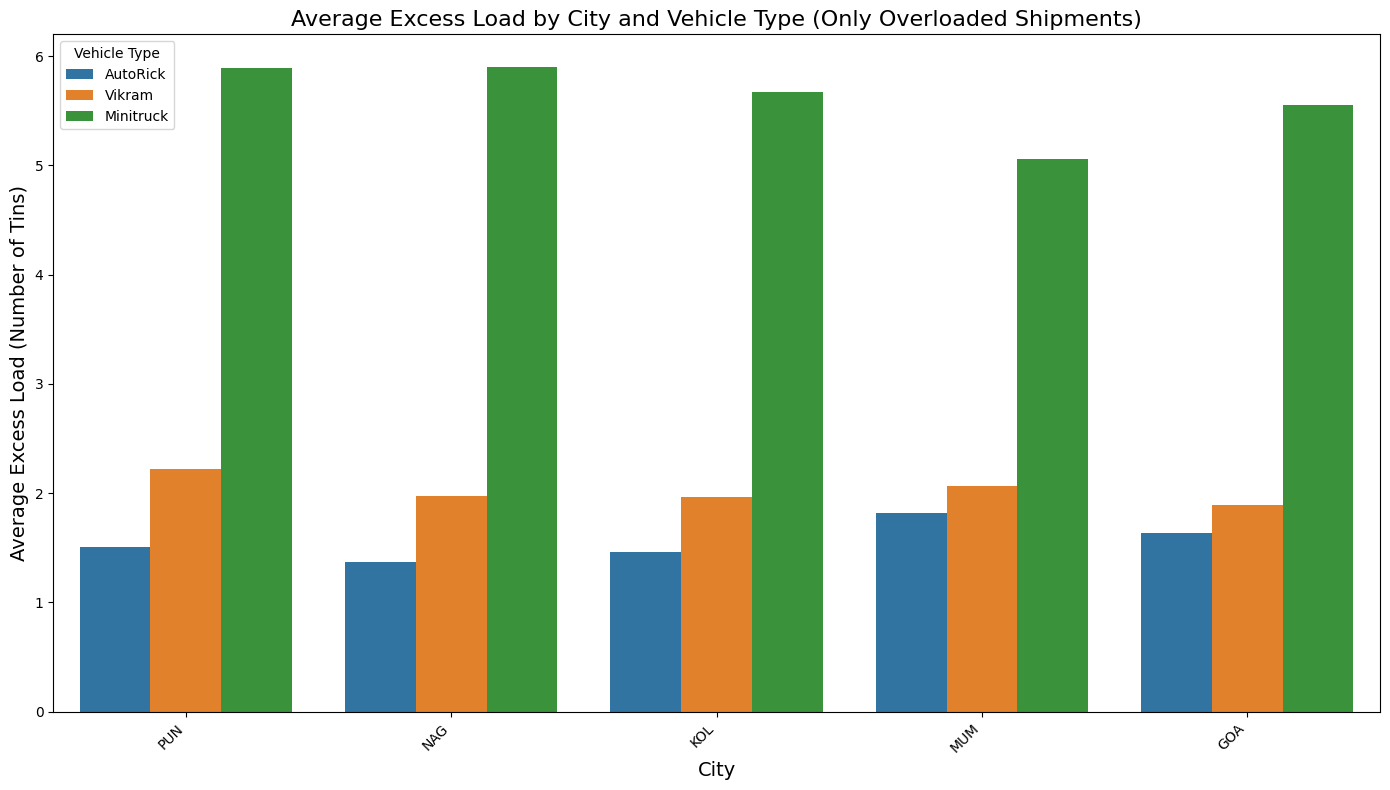

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='ExcessLoad', hue='Vehicle', data=df[df['ExcessLoad'] > 0], errorbar=None)
plt.title('Average Excess Load by City and Vehicle Type (Only Overloaded Shipments)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Excess Load (Number of Tins)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig('excess_load_by_city_vehicle.png')
plt.show()

In [ ]:
excess_pivot = pd.pivot_table(df[df['Overloaded']],
                             values='ExcessLoadPercentage',
                             index='City',
                             columns='Vehicle',
                             aggfunc='mean')

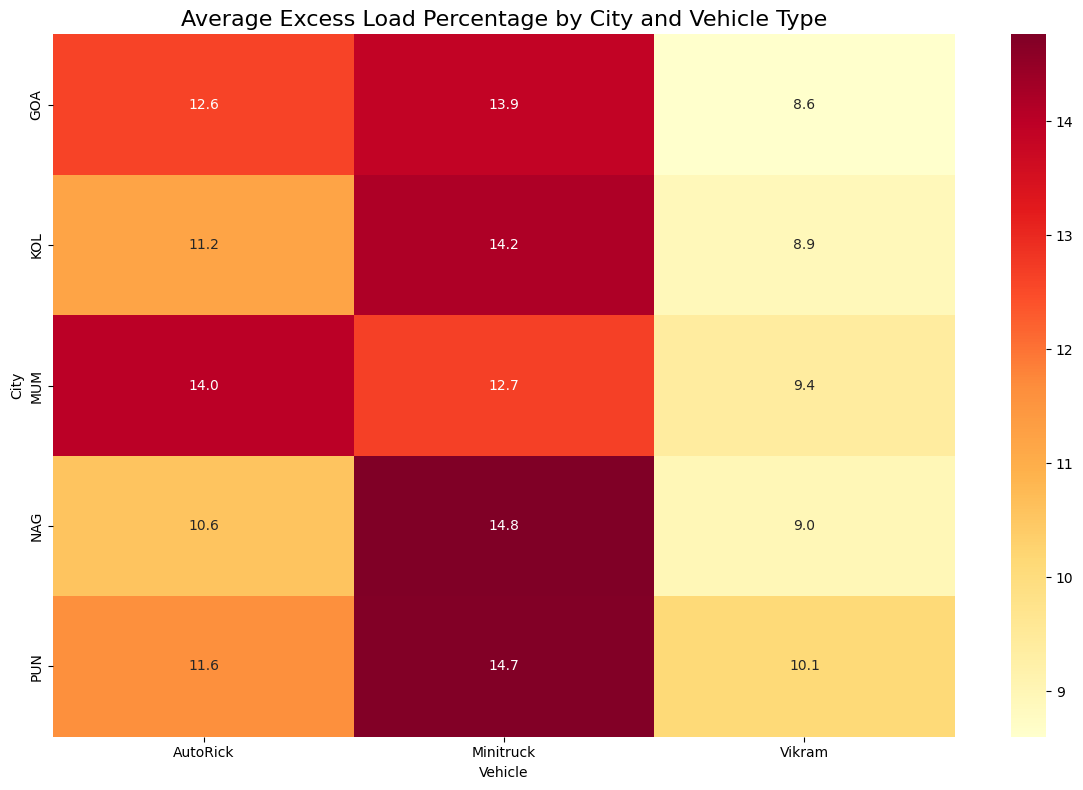

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(excess_pivot, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Average Excess Load Percentage by City and Vehicle Type', fontsize=16)
plt.tight_layout()
plt.savefig('excess_load_heatmap.png')
plt.show()

<ipython-input-89-313d0263fb3f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle', y='DamageRate', data=df, palette='viridis')


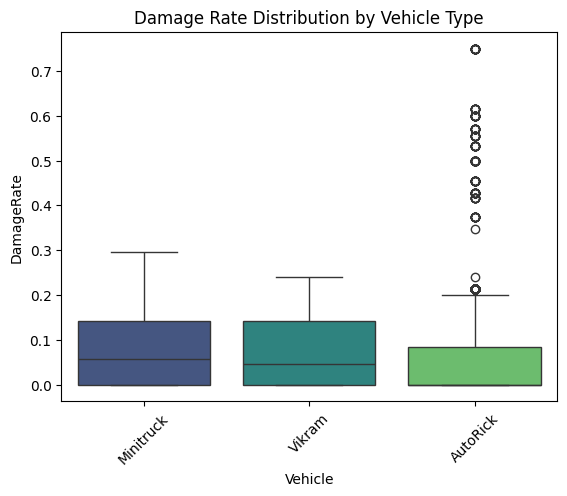

In [ ]:
sns.boxplot(x='Vehicle', y='DamageRate', data=df, palette='viridis')
plt.title("Damage Rate Distribution by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

<ipython-input-90-3bfc80c9c431>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='DamageRate', data=df, palette='viridis')


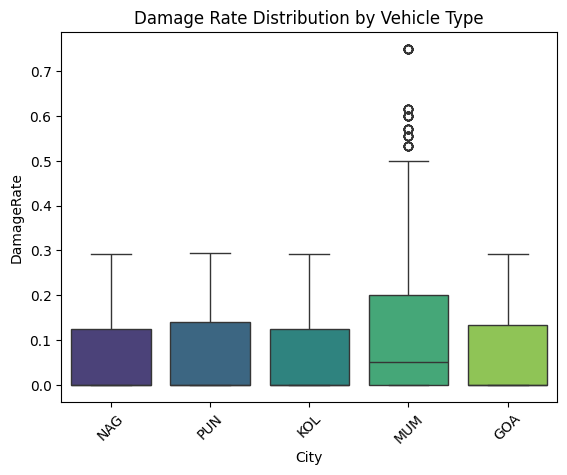

In [ ]:
sns.boxplot(x='City', y='DamageRate', data=df, palette='viridis')
plt.title("Damage Rate Distribution by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

<ipython-input-91-2ce102ca2ccc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer', y='DamageRate', data=df, palette='viridis')


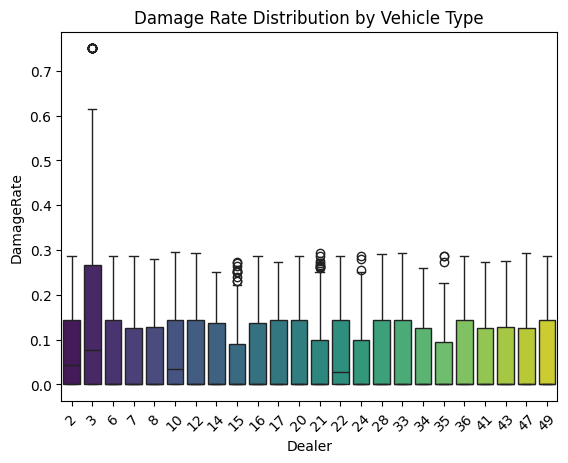

In [ ]:
sns.boxplot(x='Dealer', y='DamageRate', data=df, palette='viridis')
plt.title("Damage Rate Distribution by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df['Month_Name'] = df['Date'].dt.month_name()

In [ ]:
monthly_damage = df.groupby('Month_Name')['DamageRate'].mean().reset_index()

In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_damage['Month_Name'] = pd.Categorical(
    monthly_damage['Month_Name'], categories=month_order, ordered=True
)
monthly_damage = monthly_damage.sort_values('Month_Name')

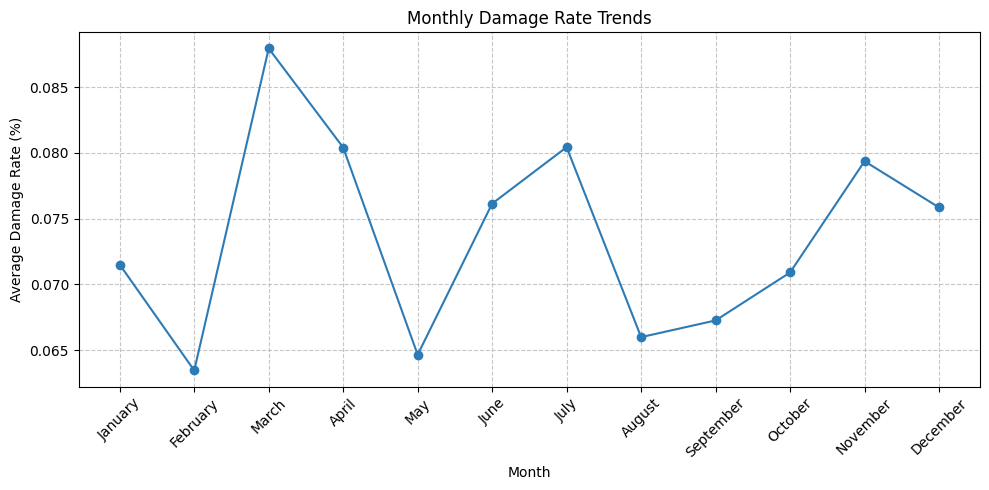

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_damage['Month_Name'], monthly_damage['DamageRate'], marker='o', color='#2c7bb6')
plt.xlabel('Month')
plt.ylabel('Average Damage Rate (%)')
plt.title('Monthly Damage Rate Trends')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

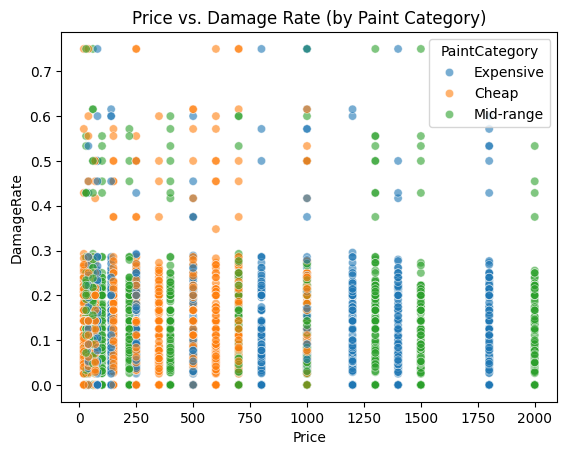

In [ ]:
sns.scatterplot(x='Price', y='DamageRate', hue='PaintCategory', data=df, alpha=0.6)
plt.title("Price vs. Damage Rate (by Paint Category)")
plt.show()